In [46]:
import numpy as np
import pandas as pd

In [47]:
df = pd.read_csv("/home/user/Music/python/projects/dirty_student_ai_dataset.csv")

In [48]:
df.info()
df.shape
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10200 entries, 0 to 10199
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   StudentLevel              9753 non-null   object 
 1   Discipline                9344 non-null   object 
 2   SessionDate               9720 non-null   object 
 3   SessionLengthMin          9206 non-null   float64
 4   TotalPrompts              9696 non-null   float64
 5   TaskType                  9731 non-null   object 
 6   AI_AssistanceLevel        9715 non-null   float64
 7   FinalOutcome              9762 non-null   object 
 8   UsedAgain                 9762 non-null   object 
 9   SatisfactionRating        9159 non-null   float64
 10  DayOfWeek                 9794 non-null   object 
 11  IsWeekend                 9752 non-null   object 
 12  PromptsPerMinute          9202 non-null   float64
 13  EstimatedSessionCost_USD  9697 non-null   float64
 14  Studen

,SessionLengthMin,TotalPrompts,AI_AssistanceLevel,SatisfactionRating,PromptsPerMinute,EstimatedSessionCost_USD,StudentAge,AcademicPressureScore,GpaImprovement
count,9206.000000,9696.000000,9715.000000,9159.000000,9202.000000,9697.000000,9701.000000,9663.000000,9683.000000
mean,21.953496,6.752893,3.473803,3.412687,0.287944,0.055845,21.095351,50.678878,0.248729
std,47.340663,25.606754,0.990696,1.143270,0.374287,0.046233,4.467902,28.733810,0.143334
min,0.030000,1.000000,1.000000,1.000000,0.100000,0.010000,14.000000,1.000000,0.000000
25%,9.610000,2.000000,3.000000,2.600000,0.210000,0.020000,18.000000,26.000000,0.130000
50%,16.700000,4.000000,4.000000,3.500000,0.260000,0.040000,20.000000,51.000000,0.250000
75%,26.700000,8.000000,4.000000,4.400000,0.340000,0.080000,23.000000,76.000000,0.370000
max,991.920315,560.602310,5.000000,5.000000,33.330000,0.390000,34.000000,100.000000,0.500000


In [49]:
df["StudentLevel"] = df["StudentLevel"].str.strip()
df["Discipline"] = df["Discipline"].str.strip()
df["SessionDate"] = df["SessionDate"].str.strip()
df["TaskType"] = df["TaskType"].str.strip()
df["FinalOutcome"] = df["FinalOutcome"].str.strip()
df["UsedAgain"] = df["UsedAgain"].str.strip()
df["DayOfWeek"] = df["DayOfWeek"].str.strip()
df["IsWeekend"] = df["IsWeekend"].str.strip()
df.IsWeekend.value_counts()


IsWeekend
False    5585
True     2282
false     685
FALSE     617
true      274
TRUE      234
NAN        47
nan        28
Name: count, dtype: int64

In [50]:
missing= [""," ","NA","N/A","na","n/a","NAN","nan",None]
df.isin(missing).sum()


StudentLevel                 68
Discipline                  115
SessionDate                  49
SessionLengthMin              0
TotalPrompts                  0
TaskType                     73
AI_AssistanceLevel            0
FinalOutcome                 65
UsedAgain                    81
SatisfactionRating            0
DayOfWeek                    59
IsWeekend                    75
PromptsPerMinute              0
EstimatedSessionCost_USD      0
StudentAge                    0
AcademicPressureScore         0
GpaImprovement                0
dtype: int64

In [51]:
df = df.replace(missing,np.nan)
df.isin(missing).sum()

StudentLevel                0
Discipline                  0
SessionDate                 0
SessionLengthMin            0
TotalPrompts                0
TaskType                    0
AI_AssistanceLevel          0
FinalOutcome                0
UsedAgain                   0
SatisfactionRating          0
DayOfWeek                   0
IsWeekend                   0
PromptsPerMinute            0
EstimatedSessionCost_USD    0
StudentAge                  0
AcademicPressureScore       0
GpaImprovement              0
dtype: int64

In [52]:
df.isnull().sum()

StudentLevel                 515
Discipline                   971
SessionDate                  529
SessionLengthMin             994
TotalPrompts                 504
TaskType                     542
AI_AssistanceLevel           485
FinalOutcome                 503
UsedAgain                    519
SatisfactionRating          1041
DayOfWeek                    465
IsWeekend                    523
PromptsPerMinute             998
EstimatedSessionCost_USD     503
StudentAge                   499
AcademicPressureScore        537
GpaImprovement               517
dtype: int64

In [53]:
pd.DataFrame({"Missing":df.isnull().sum(),"percentage":(df.isnull().sum()/len(df))*100,"datatypes":df.dtypes}).query("Missing>0")

,Missing,percentage,datatypes
StudentLevel,515,5.049020,object
Discipline,971,9.519608,object
SessionDate,529,5.186275,object
SessionLengthMin,994,9.745098,float64
TotalPrompts,504,4.941176,float64
TaskType,542,5.313725,object
AI_AssistanceLevel,485,4.754902,float64
FinalOutcome,503,4.931373,object
UsedAgain,519,5.088235,object
SatisfactionRating,1041,10.205882,float64


duplicates

In [54]:
df.StudentLevel.value_counts()
df["StudentLevel"] = df["StudentLevel"].fillna(df["StudentLevel"].mode()[0])
df.StudentLevel.isnull().sum()

np.int64(0)

In [55]:
df.Discipline.describe()
df["Discipline"] = df["Discipline"].fillna("Unknown")
df.Discipline.isnull().sum()


np.int64(0)

In [56]:
df.SessionDate.describe()
df["SessionDate"] = pd.to_datetime(df["SessionDate"],errors = "coerce")
df["SessionDate"] = df.SessionDate.fillna(method="ffill")
df.SessionDate.isnull().sum()

/tmp/ipykernel_181737/2461652687.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df["SessionDate"] = df.SessionDate.fillna(method="ffill")


np.int64(0)

In [57]:
df.SessionLengthMin.describe()
df.SessionLengthMin.isnull().all()
df.SessionLengthMin.median()
df["SessionLengthMin"]= df["SessionLengthMin"].fillna(df["SessionLengthMin"].median())
df.SessionLengthMin.isnull().sum()

np.int64(0)

In [58]:
df.TotalPrompts.describe()
df["TotalPrompts"] = df.TotalPrompts.fillna(df.TotalPrompts.median())
df.TotalPrompts.isnull().sum()

np.int64(0)

In [59]:
df = df.fillna({"TaskType":df["TaskType"].mode().iloc[0],
                "FinalOutcome":df["FinalOutcome"].mode().iloc[0],
                "UsedAgain":df["UsedAgain"].mode().iloc[0],
                "SatisfactionRating":df["SatisfactionRating"].median(),
                "AI_AssistanceLevel":df["AI_AssistanceLevel"].median(),
                "DayOfWeek":df["DayOfWeek"].mode().iloc[0],
                "IsWeekend":"Unknown"
                })

In [60]:
df = df.fillna({
    "PromptsPerMinute":df["PromptsPerMinute"].mode().iloc[0],
    "EstimatedSessionCost_USD":df["EstimatedSessionCost_USD"].mode().iloc[0],
    "StudentAge":df["StudentAge"].mode().iloc[0],
    "AcademicPressureScore":df["AcademicPressureScore"].median(),
    "GpaImprovement":df["GpaImprovement"].median()
})

In [61]:
df.isnull().sum()[df.isnull().any()]

Series([], dtype: int64)

duplicates

In [62]:
df.duplicated().sum()

np.int64(6)

In [63]:
df = df.drop_duplicates()

Data Formatting

In [64]:
df.dtypes

StudentLevel                        object
Discipline                          object
SessionDate                 datetime64[ns]
SessionLengthMin                   float64
TotalPrompts                       float64
TaskType                            object
AI_AssistanceLevel                 float64
FinalOutcome                        object
UsedAgain                           object
SatisfactionRating                 float64
DayOfWeek                           object
IsWeekend                           object
PromptsPerMinute                   float64
EstimatedSessionCost_USD           float64
StudentAge                         float64
AcademicPressureScore              float64
GpaImprovement                     float64
dtype: object

In [65]:
df.head()

,StudentLevel,Discipline,SessionDate,SessionLengthMin,TotalPrompts,TaskType,AI_AssistanceLevel,FinalOutcome,UsedAgain,SatisfactionRating,DayOfWeek,IsWeekend,PromptsPerMinute,EstimatedSessionCost_USD,StudentAge,AcademicPressureScore,GpaImprovement
0,Undergraduate,Computer Science,2024-11-03,31.20,11.0,STUDYING,2.0,ASSIGNMENT COMPLETED,true,1.0,sunday,True,0.35,0.11,23.0,87.0,0.22
1,Undergraduate,psychology,2024-11-03,13.09,6.0,Studying,3.0,Assignment Completed,True,2.0,Sunday,True,0.46,0.06,21.0,27.0,0.06
2,Undergraduate,Business,2024-11-03,19.22,5.0,Coding,3.0,Assignment Completed,True,3.3,Sunday,True,0.26,0.05,20.0,95.0,0.39
3,Undergraduate,Unknown,2025-05-06,3.70,4.0,Coding,3.0,Assignment Completed,True,3.5,Tuesday,False,0.20,0.01,22.0,85.0,0.47
4,Undergraduate,Psychology,2025-03-18,28.12,9.0,Writing,3.0,Assignment Completed,True,2.9,TUESDAY,False,0.32,0.09,23.0,56.0,0.16


In [66]:
df.StudentLevel.value_counts()
df["StudentLevel"] = df["StudentLevel"].str.lower()
df["StudentLevel"] =df["StudentLevel"].str.title()
df.StudentLevel.value_counts()

StudentLevel
Undergraduate    6333
High School      1935
Graduate         1926
Name: count, dtype: int64

In [67]:
df.Discipline.value_counts()
df["Discipline"] = df["Discipline"].str.lower()
df.Discipline.value_counts()
df["Discipline"] = df["Discipline"].str.title()
df.Discipline.value_counts()

Discipline
Biology             1355
Engineering         1320
Computer Science    1313
Math                1313
History             1313
Psychology          1308
Business            1302
Unknown              970
Name: count, dtype: int64

In [68]:
df.AI_AssistanceLevel.value_counts()
df.AI_AssistanceLevel = df.AI_AssistanceLevel.astype(int)
df.AI_AssistanceLevel.value_counts()

AI_AssistanceLevel
4    3834
3    3276
5    1524
2    1326
1     234
Name: count, dtype: int64

In [69]:
df.FinalOutcome.value_counts()
df.FinalOutcome = df.FinalOutcome.str.title()
df.FinalOutcome.value_counts()

FinalOutcome
Assignment Completed    5122
Idea Drafted            2758
Confused                1582
Gave Up                  732
Name: count, dtype: int64

In [70]:
df.UsedAgain.value_counts()
df.UsedAgain = df.UsedAgain.str.title()
df.UsedAgain.value_counts()

UsedAgain
True     7337
False    2857
Name: count, dtype: int64

In [71]:
df.DayOfWeek.value_counts()
df.DayOfWeek = df.DayOfWeek.str.title()
df.DayOfWeek.value_counts()

DayOfWeek
Friday       1908
Sunday       1409
Saturday     1391
Thursday     1391
Monday       1382
Wednesday    1366
Tuesday      1347
Name: count, dtype: int64

In [72]:
df.IsWeekend.value_counts()
df.IsWeekend = df.IsWeekend.str.title()
df.IsWeekend.value_counts()

IsWeekend
False      6884
True       2787
Unknown     523
Name: count, dtype: int64

In [73]:
df.TaskType.value_counts()
df["TaskType"] = df["TaskType"].str.title()
df.TaskType.value_counts()

TaskType
Writing          3531
Studying         1973
Coding           1901
Homework Help    1881
Research          456
Brainstorming     452
Name: count, dtype: int64

In [74]:
df.StudentAge.value_counts()
df.StudentAge = df.StudentAge.astype(int)
df.StudentAge.value_counts()

StudentAge
18    1913
22    1092
23    1088
20    1005
19     976
21     955
17     405
15     386
16     369
14     367
32     168
28     163
33     157
31     154
26     154
24     153
30     146
27     143
34     141
29     135
25     124
Name: count, dtype: int64

In [75]:
df.AcademicPressureScore.value_counts()
df.AcademicPressureScore =df.AcademicPressureScore.astype(int)
df.AcademicPressureScore.value_counts()

AcademicPressureScore
51    642
14    129
60    125
34    120
37    119
     ... 
69     80
53     79
92     78
12     75
24     71
Name: count, Length: 100, dtype: int64

In [76]:
df.TotalPrompts.value_counts()
df.TotalPrompts = df.TotalPrompts.astype(int)
df.TotalPrompts.value_counts()

TotalPrompts
4      1574
1      1544
2      1234
3      1184
5       804
6       786
7       585
8       463
9       405
10      324
11      258
12      205
13      159
14      122
15      111
16       92
17       69
18       50
19       40
20       34
22       25
21       25
560      20
23       18
25       12
26       10
24       10
28        8
31        4
29        4
38        3
27        3
39        2
34        2
30        2
32        1
33        1
36        1
Name: count, dtype: int64

In [77]:
df = df.rename(columns={"Discipline":"Department"})

In [78]:
df.head(3)

,StudentLevel,Department,SessionDate,SessionLengthMin,TotalPrompts,TaskType,AI_AssistanceLevel,FinalOutcome,UsedAgain,SatisfactionRating,DayOfWeek,IsWeekend,PromptsPerMinute,EstimatedSessionCost_USD,StudentAge,AcademicPressureScore,GpaImprovement
0,Undergraduate,Computer Science,2024-11-03,31.20,11,Studying,2,Assignment Completed,True,1.0,Sunday,True,0.35,0.11,23,87,0.22
1,Undergraduate,Psychology,2024-11-03,13.09,6,Studying,3,Assignment Completed,True,2.0,Sunday,True,0.46,0.06,21,27,0.06
2,Undergraduate,Business,2024-11-03,19.22,5,Coding,3,Assignment Completed,True,3.3,Sunday,True,0.26,0.05,20,95,0.39


No Outliers present in the dataset

In [79]:
q1 = df["SessionLengthMin"].quantile(0.25)
q3 = df["SessionLengthMin"].quantile(0.75)
iqr = q3-q1
iqr

np.float64(14.95)

In [80]:
low = q1 - 1.5*iqr
upp = q3 + 1.5*iqr
df = df[(df["SessionLengthMin"]>=low)&(df["SessionLengthMin"]<=upp)]
low


np.float64(-12.084999999999997)

creating a new cleaned dataset

In [81]:
df.to_csv("/home/user/Music/python/projects/cleaned_student_ai_dataset.csv",index=False)

VISUALIZATION

In [82]:
import matplotlib.pyplot as plt

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9730 entries, 0 to 10199
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   StudentLevel              9730 non-null   object        
 1   Department                9730 non-null   object        
 2   SessionDate               9730 non-null   datetime64[ns]
 3   SessionLengthMin          9730 non-null   float64       
 4   TotalPrompts              9730 non-null   int64         
 5   TaskType                  9730 non-null   object        
 6   AI_AssistanceLevel        9730 non-null   int64         
 7   FinalOutcome              9730 non-null   object        
 8   UsedAgain                 9730 non-null   object        
 9   SatisfactionRating        9730 non-null   float64       
 10  DayOfWeek                 9730 non-null   object        
 11  IsWeekend                 9730 non-null   object        
 12  PromptsPerMinute        

In [84]:
df.head()

,StudentLevel,Department,SessionDate,SessionLengthMin,TotalPrompts,TaskType,AI_AssistanceLevel,FinalOutcome,UsedAgain,SatisfactionRating,DayOfWeek,IsWeekend,PromptsPerMinute,EstimatedSessionCost_USD,StudentAge,AcademicPressureScore,GpaImprovement
0,Undergraduate,Computer Science,2024-11-03,31.20,11,Studying,2,Assignment Completed,True,1.0,Sunday,True,0.35,0.11,23,87,0.22
1,Undergraduate,Psychology,2024-11-03,13.09,6,Studying,3,Assignment Completed,True,2.0,Sunday,True,0.46,0.06,21,27,0.06
2,Undergraduate,Business,2024-11-03,19.22,5,Coding,3,Assignment Completed,True,3.3,Sunday,True,0.26,0.05,20,95,0.39
3,Undergraduate,Unknown,2025-05-06,3.70,4,Coding,3,Assignment Completed,True,3.5,Tuesday,False,0.20,0.01,22,85,0.47
4,Undergraduate,Psychology,2025-03-18,28.12,9,Writing,3,Assignment Completed,True,2.9,Tuesday,False,0.32,0.09,23,56,0.16


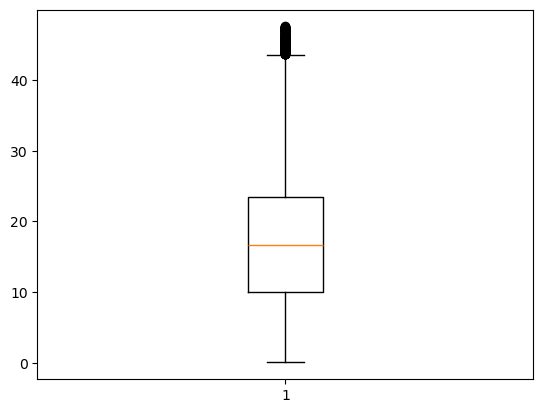

float64
9730
3529


In [85]:
plt.boxplot(df["SessionLengthMin"])
plt.show()
print(df["SessionLengthMin"].dtype)
print(df["SessionLengthMin"].count())
print(df["SessionLengthMin"].nunique())